<img src="images/logo-64x64.png"/>
<h1>Reference Guide for Calysto Scheme</h1>

[Calysto Scheme](https://github.com/Calysto/calysto_scheme) is a real Scheme programming language, with full support for continuations, including call/cc. It can also use all Python libraries. Also has some extensions that make it more useful (stepper-debugger, choose/fail, stack traces), or make it better integrated with Python.

In Jupyter notebooks, because Calysto Scheme uses [MetaKernel](https://github.com/Calysto/metakernel/blob/master/README.rst), it has a fully-supported set of "magics"---meta-commands for additional functionality. This includes running Scheme in parallel. See all of the [MetaKernel Magics](https://github.com/Calysto/metakernel/blob/master/metakernel/magics/README.md).

Calysto Scheme is written in Scheme, and then translated into Python (and other backends). The entire functionality lies in a single Python file: https://github.com/Calysto/calysto_scheme/blob/master/calysto_scheme/scheme.py However, you can easily install it (see below).

Please see [Calysto Scheme Language](Calysto%20Scheme%20Language.ipynb) for more details on the Calysto Scheme language.

## Installation

You can install Calysto Scheme with Python3:

```
pip3 install --upgrade calysto-scheme --user -U
python3 -m calysto_kernel install --user
```

or in the system kernel folder with:

```
sudo pip3 install --upgrade calysto-scheme -U
sudo python3 -m calysto_kernel install
```

Change pip3/python3 to use a different pip or Python. The version of Python used will determine how Calysto Scheme is run.

Use it in the console, qtconsole, or notebook with IPython 3:

```
ipython console --kernel calysto_scheme
ipython qtconsole --kernel calysto_scheme
ipython notebook --kernel calysto_scheme
```

In addition to all of the following items, Calysto Scheme also has access to all of Python's builtin functions, and all of Python's libraries. For example, you can use `(complex 3 2)` to create a complex number by calling Python's complex function.

## Jupyter Enhancements

When you run Calysto Scheme in Jupyter (console, notebook, qtconsole, etc.) you get:

* TAB completions of Scheme functions and variable names
* display of rich media
* stepper/debugger
* magics (% macros)
* shell commands (! command)
* LaTeX equations
* LaTeX-style variables
* Python integration

### LaTeX-style variables

Calysto Scheme allows you to use LaTeX-style variables in code. For example, if you type:

```
\beta
```

with the cursor right after the 'a' in beta, and then press TAB, it will turn into the unicode character:

```
β
```

There are nearly 1300 different symbols defined (thanks to the Julia language) and documented here:

http://docs.julialang.org/en/release-0.4/manual/unicode-input/#man-unicode-input

Calysto Scheme may not implement all of those. Some useful and suggestive ones:

* \pi - π
* \Pi - Π
* \Sigma - Σ
* \_i - subscript i, such as vectorᵢ

In [1]:
(define α 67)

In [2]:
α

67

In [6]:
(define i 2)
(define vectorᵢ (vector-ref (vector 0 6 3 2) i))
vectorᵢ

3

### Rich media

In [2]:
(import "calysto.display")

(calysto)

In [3]:
(calysto.display.HTML "This is <b>bold</b>, <i>italics</i>, <u>underlined</u>.")

In [13]:
(import "calysto.graphics")

(calysto)

In [14]:
(define canvas (calysto.graphics.Canvas))

In [15]:
(define ball (calysto.graphics.Circle '(150 150) 100))

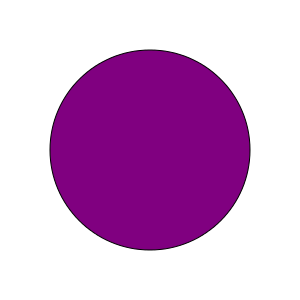

In [16]:
(ball.draw canvas)

### Shell commands

In [3]:
! ls /tmp

config-err-7810dL  emacs1000  unity_support_test.0  uploads
/home/dblank/Desktop/ProgLangBook
config-err-7810dL  emacs1000  unity_support_test.0  uploads


### Stepper/Debugger

Here is what the debugger looks like:

<img src="images/stepper_debugger.png">

It has breakpoints (click in left margin). You must press Stop to exit the debugger.

```scheme
%%debug

(begin
 (define x 1)
 (set! x 2)
)
```

### Python Integration

You can import and use any Python library in Calysto Scheme.

In addition, if you wish, you can execute expressions and statements in a Python environment:

In [10]:
(python-eval "1 + 2")

3

In [1]:
(python-exec 
"
def mypyfunc(a, b):
    return a * b
")

This is a shared environment with Scheme:

In [2]:
(mypyfunc 4 5)

20

You can use `func` to turn a Scheme procedure into a Python function, and `define!` to put it into the shared enviornment with Python:

In [4]:
(define! mypyfunc2 (func (lambda (n) n)))

In [5]:
(python-eval "mypyfunc2(34)")

34

# Differences Between Languages

## Major differences between Scheme and Python

1. In Scheme, double quotes are used for strings and may contain newlines
1. In Scheme, a single quote is short for (quote ...) and means "literal"
1. In Scheme, everything is an expression and has a return value
1. Python does not support macros (e.g., extending syntax)
1. In Python, "if X" is false if X is None, False, [], (,) or 0. In Scheme, "if X" is only false if X is #f or 0
1. Calysto Scheme uses continuations, not the call stack. However, for debugging there is a pseudo-stack when an error is raised. You can trun that off with (use-stack-trace #f)
1. Scheme procedures are not Python functions, but there are means to use one as the other.

## Major Differences Between Calysto Scheme and other Schemes

1. define-syntax works slightly differently
1. In Calysto Scheme, #(...) is short for '#(...)
1. Calysto Scheme is missing many standard functions (see list at bottom)
1. Calysto Scheme has a built-in amb operator called `choose`
1. For debugging there is a pseudo-stack when errors are raised in Calysto Scheme. You can trun that off with (use-stack-trace #f)

### Stack Trace

Calysto Scheme acts as if it has a call stack, for easier debugging. For example:

In [4]:
(define fact
    (lambda (n)
      (if (= n 1)
           q
           (* n (fact (- n 1))))))

In [5]:
(fact 5)


Traceback (most recent call last):
  File "In [5]", line 1, col 1, in 'fact'
  File "In [4]", line 5, col 17, in 'fact'
  File "In [4]", line 5, col 17, in 'fact'
  File "In [4]", line 5, col 17, in 'fact'
  File "In [4]", line 5, col 17, in 'fact'
  File "In [4]", line 4, col 12
RunTimeError: unbound variable 'q'



To turn off the stack trace on error:

```scheme
(use-stack-trace #f)
```
That will allow infinite recursive loops without keeping track of the "stack".

# Calysto Scheme Variables

## SCHEMEPATH
SCHEMEPATH is a list of search directories used with (load NAME). This is a reference, so you should append to it rather than attempting to redefine it.

In [6]:
SCHEMEPATH

("." "/usr/local/lib/python3.4/dist-packages/calysto_scheme/modules")

In [7]:
(set-cdr! (cdr SCHEMEPATH) (list "/var/modules"))

In [8]:
SCHEMEPATH

("." "/usr/local/lib/python3.4/dist-packages/calysto_scheme/modules" "/var/modules")

## Getting Started

Note that you can use the word `lambda` or \lambda and then press [TAB]

In [3]:
(define factorial
  (λ (n)
     (cond
      ((zero? n) 1)
      (else (* n (factorial (- n 1)))))))

In [4]:
(factorial 5)

120

## define-syntax
(define-syntax NAME RULES): a method for creating macros

In [104]:
(define-syntax time 
  [(time ?exp) (let ((start (current-time)))
                 ?exp
                 (- (current-time) start))])

In [105]:
(time (car '(1 2 3 4)))

0.0002892017364501953

In [106]:
;;---------------------------------------------------------------------
;; collect is like list comprehension in Python

(define-syntax collect
  [(collect ?exp for ?var in ?list)
   (filter-map (lambda (?var) ?exp) (lambda (?var) #t) ?list)]
  [(collect ?exp for ?var in ?list if ?condition)
   (filter-map (lambda (?var) ?exp) (lambda (?var) ?condition) ?list)])

(define filter-map
  (lambda (f pred? values)
    (if (null? values)
      '()
      (if (pred? (car values))
          (cons (f (car values)) (filter-map f pred? (cdr values)))
          (filter-map f pred? (cdr values))))))

In [107]:
(collect (* n n) for n in (range 10))

(0 1 4 9 16 25 36 49 64 81)

In [108]:
(collect (* n n) for n in (range 5 20 3))

(25 64 121 196 289)

In [109]:
(collect (* n n) for n in (range 10) if (> n 5))

(36 49 64 81)

In [110]:
;;---------------------------------------------------------------------
;; for loops

(define-syntax for
  [(for ?exp times do . ?bodies)
   (for-repeat ?exp (lambda () . ?bodies))]
  [(for ?var in ?exp do . ?bodies)
   (for-iterate1 ?exp (lambda (?var) . ?bodies))]
  [(for ?var at (?i) in ?exp do . ?bodies)
   (for-iterate2 0 ?exp (lambda (?var ?i) . ?bodies))]
  [(for ?var at (?i ?j . ?rest) in ?exp do . ?bodies)
   (for ?var at (?i) in ?exp do
     (for ?var at (?j . ?rest) in ?var do . ?bodies))])

(define for-repeat
  (lambda (n f)
    (if (< n 1)
      'done
      (begin
        (f)
        (for-repeat (- n 1) f)))))

(define for-iterate1
  (lambda (values f)
    (if (null? values)
      'done
      (begin
        (f (car values))
        (for-iterate1 (cdr values) f)))))

(define for-iterate2
  (lambda (i values f)
    (if (null? values)
      'done
      (begin
        (f (car values) i)
        (for-iterate2 (+ i 1) (cdr values) f)))))

In [111]:
(define matrix2d
  '((10 20)
    (30 40)
    (50 60)
    (70 80)))

(define matrix3d
  '(((10 20 30) (40 50 60))
    ((70 80 90) (100 110 120))
    ((130 140 150) (160 170 180))
    ((190 200 210) (220 230 240))))

In [112]:
(begin 
 (define hello 0)
 (for 5 times do (set! hello (+ hello 1)))
 hello
 )

5

In [113]:
(for sym in '(a b c d) do (define x 1) (set! x sym) x)

done

In [114]:
(for n in (range 10 20 2) do n)

done

In [115]:
(for n at (i j) in matrix2d do (list n 'coords: i j))

done

In [116]:
(for n at (i j k) in matrix3d do (list n 'coords: i j k))

done

In [117]:
(define-syntax scons
  [(scons ?x ?y) (cons ?x (lambda () ?y))])

(define scar car)

(define scdr
  (lambda (s)
    (let ((result ((cdr s))))
      (set-cdr! s (lambda () result))
      result)))

(define first
  (lambda (n s)
    (if (= n 0)
      '()
      (cons (scar s) (first (- n 1) (scdr s))))))

(define nth
  (lambda (n s)
    (if (= n 0)
      (scar s)
      (nth (- n 1) (scdr s)))))

(define smap
  (lambda (f s)
    (scons (f (scar s)) (smap f (scdr s)))))

(define ones (scons 1 ones))

(define nats (scons 0 (combine nats + ones)))

(define combine
  (lambda (s1 op s2)
    (scons (op (scar s1) (scar s2)) (combine (scdr s1) op (scdr s2)))))

(define fibs (scons 1 (scons 1 (combine fibs + (scdr fibs)))))

(define facts (scons 1 (combine facts * (scdr nats))))

(define ! (lambda (n) (nth n facts)))

In [118]:
(! 5)

120

In [119]:
(nth 10 facts)

3628800

In [120]:
(nth 20 fibs)

10946

In [121]:
(first 30 fibs)

(1 1 2 3 5 8 13 21 34 55 89 144 233 377 610 987 1597 2584 4181 6765 10946 17711 28657 46368 75025 121393 196418 317811 514229 832040)

## for-each
(for-each PROCEDURE LIST): apply PROCEDURE to each item in LIST; like `map` but don't return results

In [136]:
(for-each (lambda (n) (print n)) '(3 4 5))

3
4
5


## format
(format STRING ITEM ...): format the string with ITEMS as arguments

In [137]:
(format "This uses formatting ~a ~s ~%" 'apple 'apple)

"This uses formatting apple apple \n"

## func

Turns a lambda into a Python function.

(func (lambda ...))

In [9]:
(func (lambda (n) n))

<function dlr_func.<locals>.f at 0x7f7733b9c6a8>

## There's more!

Please see [Calysto Scheme Language](Calysto%20Scheme%20Language.ipynb) for more details on the Calysto Scheme language.